In this notebook:
- We will do hyperparameters optimization using (i) `Grid Search` and (ii) `Bayesian Optimization`

## Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
from sklearn.metrics import (r2_score,
                                mean_absolute_error,
                                mean_squared_error,
                                root_mean_squared_error,
                                max_error)
from sklearn.model_selection import GridSearchCV
from skopt.space import Real, Integer, Categorical
from skopt import BayesSearchCV
import warnings
warnings.filterwarnings('ignore')

## Load and split the dataset

In [2]:
X, y = make_regression(n_samples=2000, n_features=100, noise=5.0, bias=2.0, random_state=11)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## GridSearchCV

In [4]:
time_start = datetime.now()

params = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 5, 7, 10],
    'C': [0.1, 1, 5, 10, 15]
    }

gscv = GridSearchCV(estimator=SVR(),
                    param_grid=params,
                    cv=10,
                   )
gscv.fit(X_train, y_train)
print("Best Estimator :", gscv.best_estimator_)
print("Best Score :", gscv.best_score_)

model_gscv = gscv.best_estimator_
model_gscv.fit(X_train, y_train)

y_pred_gscv = model_gscv.predict(X_test)
r2 = r2_score(y_test, y_pred_gscv)
rmse = root_mean_squared_error(y_test, y_pred_gscv)

print("R2 score =", r2)
print("Root mean squared error =", rmse)
print("Coefficient of determination =", model_gscv.score(X_test, y_test))
print("Mean absolute error =", mean_absolute_error(y_test, y_pred_gscv))
print("Mean squared error =", mean_squared_error(y_test, y_pred_gscv))
print("Maximum error =", max_error(y_test, y_pred_gscv))

time_stop = datetime.now()
delta = time_stop - time_start
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

Best Estimator : SVR(C=15, degree=2, kernel='sigmoid')
Best Score : 0.9558994767695328
R2 score = 0.9816619289278014
Root mean squared error = 24.44055354946584
Coefficient of determination = 0.9816619289278014
Mean absolute error = 19.877661766126526
Mean squared error = 597.3406578043073
Maximum error = 66.38183788215963
Time to compute:  96.050788 seconds


## BayesSearchCV

In [5]:
time_start = datetime.now()

params = {
    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    'degree': Integer(1, 10, prior='uniform'),
    'C': Real(0.001, 10.0, prior='uniform'),
    }

bscv = BayesSearchCV(estimator=SVR(),
                     search_spaces=params,
                     cv=5,
                     n_iter=10,
                     return_train_score=False,
                     n_jobs=-1
                     )

_ = bscv.fit(X_train, y_train)
print("Best Estimator :", bscv.best_estimator_)
print("Best Score :", bscv.best_score_)

model_bscv = bscv.best_estimator_
model_bscv.fit(X_train, y_train)

y_pred_bscv = model_bscv.predict(X_test)
r2 = r2_score(y_test, y_pred_bscv)
rmse = root_mean_squared_error(y_test, y_pred_bscv)

print("R2 score =", r2)
print("Root mean squared error =", rmse)
print("Coefficient of determination =", model_bscv.score(X_test, y_test))
print("Mean absolute error =", mean_absolute_error(y_test, y_pred_bscv))
print("Mean squared error =", mean_squared_error(y_test, y_pred_bscv))
print("Maximum error =", max_error(y_test, y_pred_bscv))

time_stop = datetime.now()
delta = time_stop - time_start
seconds = delta.seconds + delta.microseconds/1E6
print('Time to compute: ', seconds, 'seconds')

Best Estimator : SVR(C=5.840996587105197, degree=2, kernel='linear')
Best Score : 0.9991014366088227
R2 score = 0.9992309190010494
Root mean squared error = 5.005186367444435
Coefficient of determination = 0.9992309190010494
Mean absolute error = 3.9097787632042134
Mean squared error = 25.051890572851622
Maximum error = 17.000526999708512
Time to compute:  20.096457 seconds


In [6]:
df = pd.DataFrame(bscv.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.165264,0.011249,0.043432,0.009322,9.363843,4,rbf,"{'C': 9.363842851663026, 'degree': 4, 'kernel'...",0.251257,0.232160,0.236845,0.229415,0.246017,0.239139,0.008278,7
1,0.154622,0.018320,0.037032,0.003652,4.355382,1,rbf,"{'C': 4.355381967657831, 'degree': 1, 'kernel'...",0.121798,0.112562,0.114210,0.107853,0.118207,0.114926,0.004777,9
2,4.804077,0.888761,0.016090,0.001376,5.840997,2,linear,"{'C': 5.840996587105197, 'degree': 2, 'kernel'...",0.998990,0.999185,0.999152,0.999125,0.999055,0.999101,0.000070,1
3,0.165437,0.008912,0.031243,0.003945,9.373031,3,sigmoid,"{'C': 9.373030951817256, 'degree': 3, 'kernel'...",0.714574,0.696169,0.695997,0.684188,0.707044,0.699594,0.010411,3
4,0.167671,0.025965,0.026129,0.002319,6.692767,1,sigmoid,"{'C': 6.692766912007484, 'degree': 1, 'kernel'...",0.561534,0.544024,0.540101,0.528430,0.553806,0.545579,0.011391,6
5,0.159655,0.017000,0.029754,0.004249,8.333005,10,sigmoid,"{'C': 8.333005137129748, 'degree': 10, 'kernel...",0.659330,0.641907,0.639383,0.627702,0.652217,0.644108,0.010898,5
6,1.374856,0.251594,0.019184,0.006745,1.432248,3,linear,"{'C': 1.4322483225556641, 'degree': 3, 'kernel...",0.999023,0.999145,0.999133,0.999086,0.999049,0.999087,0.000047,2
7,0.162236,0.012096,0.043175,0.006462,5.786742,8,rbf,"{'C': 5.786741738760489, 'degree': 8, 'kernel'...",0.159831,0.147835,0.150231,0.143399,0.155747,0.151409,0.005798,8
8,0.191067,0.007800,0.031213,0.003342,9.362945,2,sigmoid,"{'C': 9.362944587373626, 'degree': 2, 'kernel'...",0.714068,0.695674,0.695481,0.683678,0.706538,0.699088,0.010412,4
9,0.137820,0.009259,0.019307,0.004018,0.557729,4,poly,"{'C': 0.5577292490418537, 'degree': 4, 'kernel...",-0.000245,-0.000801,-0.000966,-0.006431,-0.001715,-0.002032,0.002249,10


In [7]:
len(df)

10

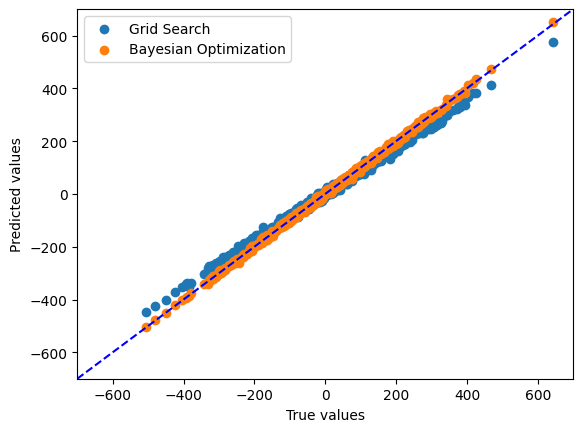

In [8]:
plt.scatter(y_test, y_pred_gscv, label="Grid Search")
plt.scatter(y_test, y_pred_bscv, label="Bayesian Optimization")
plt.xlabel("True values")
plt.ylabel("Predicted values")
i = 700
plt.plot([-i, i], [-i, i], "--", c="b")
plt.xlim(-i,i)
plt.ylim(-i,i)
plt.legend()
plt.show();